In [1]:
# Load the libraries
import pandas as pd
import numpy  as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
import platform
import sys
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.simplefilter("ignore")

# Making the plots standard 
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 5]

In [2]:
#import the training data and test data pickles 
train_df = pd.read_pickle("train_df.pickle")
test_df  = pd.read_pickle("test_df.pickle")

#get the training std 
trainrtt_mean = train_df['last_rtt'].mean()
trainrtt_std = train_df['last_rtt'].std()

In [3]:
cols_dropped = ['date','last_rtt','normalizzed_rtt','src_names']

X_train = train_df.drop(columns=cols_dropped, axis=1)
y_train = train_df['normalizzed_rtt']

X_test = test_df.drop(columns=cols_dropped, axis=1)
y_test = test_df['normalizzed_rtt'] 

In [4]:
# ARIMA AUTO REGRESSIVE INTEGRATED MOVING AVERAGE
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
import statsmodels.api as sm

# Load your time series data
time_series = test_df['normalizzed_rtt']

# Dickey-Fuller test for stationarity
result = sm.tsa.adfuller(time_series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If the time series is not stationary, apply differencing to make it stationary
if result[1] > 0.05:
    time_series_diff = time_series.diff().dropna()
else:
    time_series_diff = time_series

ADF Statistic: -4.985976719022823
p-value: 2.3655975610469307e-05


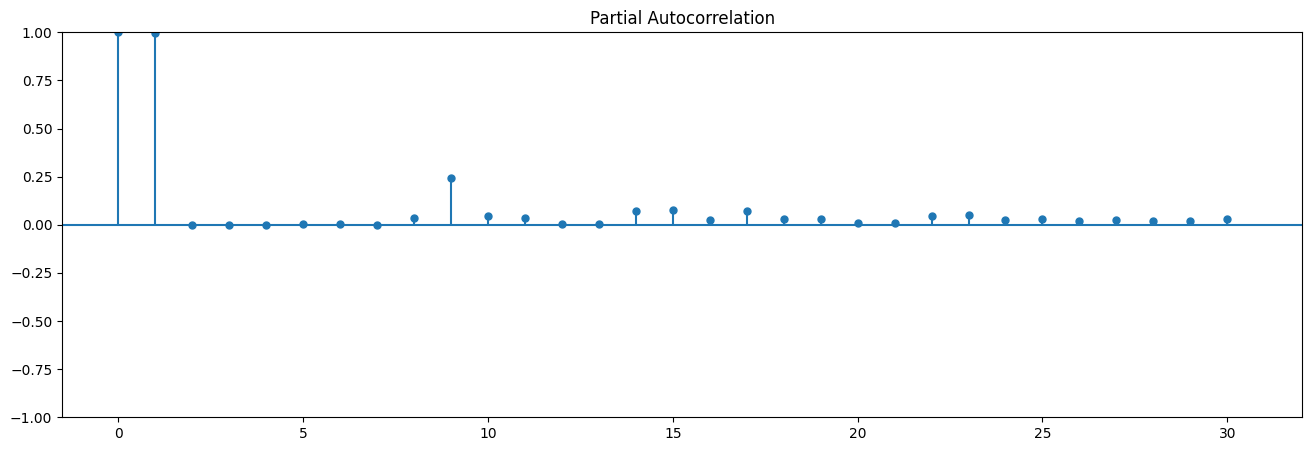

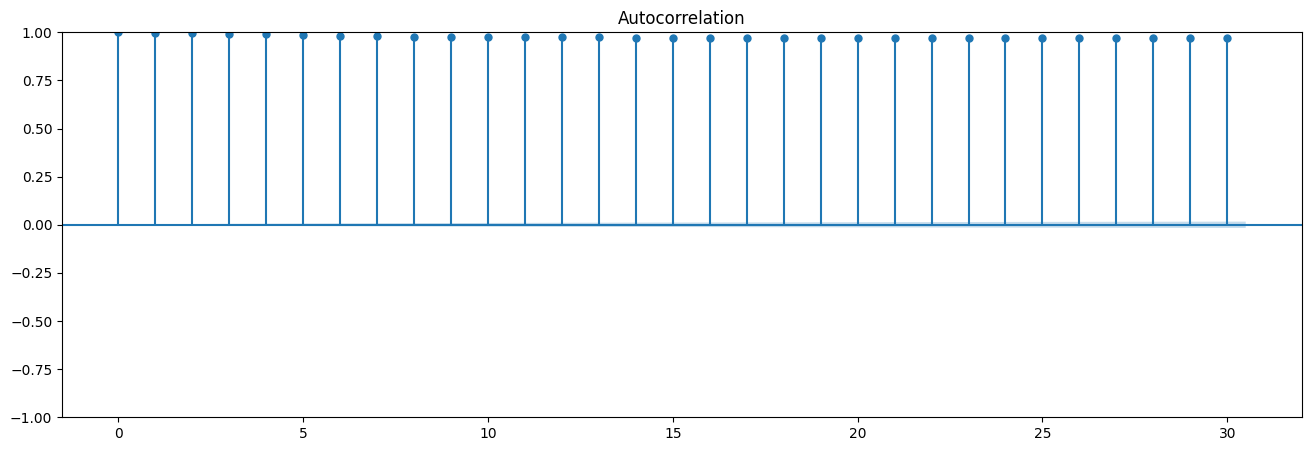

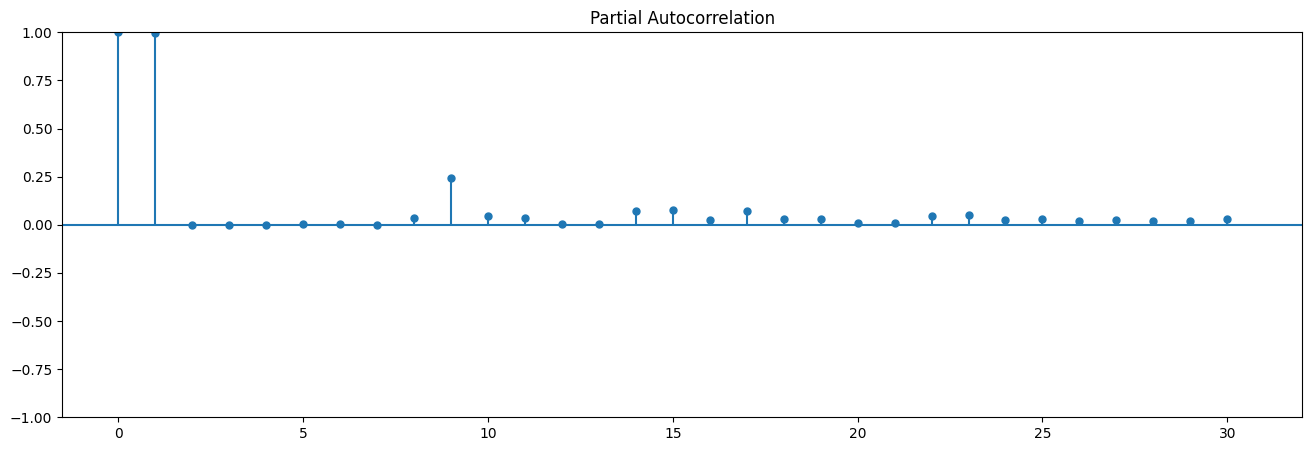

In [5]:
# Plot autocorrelation and partial autocorrelation functions
sm.graphics.tsa.plot_acf(time_series_diff, lags=30)
sm.graphics.tsa.plot_pacf(time_series_diff, lags=30)

In [6]:
#Importing the module
import pmdarima as pm

#first model 
arima_model = pm.auto_arima(y_train, start_p=0,start_q=0,test="adf",trace=True,error_action='ignore',supress_warnings = True)

#Summary of the model
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2271479.534, Time=4.87 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=14.82 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1233197.478, Time=86.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2271477.534, Time=2.40 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1860786.202, Time=19.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1862819.278, Time=182.95 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=19.75 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1863058.361, Time=281.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=25.57 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1863397.800, Time=2734.94 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=32.37 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1863780.082, Time=1007.83 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=40.90 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1864297.907, Time=544.69 sec
 ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               800414
Model:               SARIMAX(5, 0, 5)   Log Likelihood              950121.331
Date:                Fri, 19 Jan 2024   AIC                       -1900220.662
Time:                        01:30:36   BIC                       -1900093.140
Sample:                             0   HQIC                      -1900185.252
                             - 800414                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2271      0.004    -58.080      0.000      -0.235      -0.219
ar.L2          1.2356      0.002    772.923      0.000       1.232       1.239
ar.L3          1.0383      0.004    252.071      0.000       1.030       1.046
ar.L4         -0.4920      0.002   -281.645      0.000      -0.495      -0.489
ar.L5         -0.5550      0.003   -173.974      0.000      -0.561      -0.549
ma.L1          1.1964      0.004    296.020      0.000       1.189       1.204
ma.L2         -0.1519      0.003    -52.195      0.000      -0.158      -0.146
ma.L3         -1.2762      0.002   -668.980      0.000      -1.280      -1.272
ma.L4         -0.6956      0.004   -169.055      0.000      -0.704      -0.688
ma.L5         -0.0023      0.001     -2.537      0.011      -0.004      -0.001
sigma2         0.0055   4.45e-07   1.23e+04      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                  14.09   Jarque-Bera (JB):       47337295269.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             4.03
Prob(H) (two-sided):                  0.00   Kurtosis:                      1194.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
p, d, q = (5,0,5)  # Replace with your tentative values
model = sm.tsa.ARIMA(time_series, order=(p, d, q))
arima_results = model.fit()

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
test_df['arima_predictions'] = arima_results.fittedvalues

# Testing the prediction accuracy for arima
se = (test_df['normalizzed_rtt'] - test_df['arima_predictions']) ** 2
mse_arima = se.mean()

# calculate the mean squared error and standard deviation
from sklearn.metrics import mean_squared_error
rmse_arima =  np.sqrt(mean_squared_error(test_df['normalizzed_rtt'], test_df['arima_predictions']))
drmse_arima = rmse_arima * trainrtt_std
print(f"Root Mean Squared Error and denormalised rmse: {rmse_arima,drmse_arima}")

Root Mean Squared Error and denormalised rmse: (0.07396452739027337, 0.7495547902332674)


In [9]:
test_df[['normalizzed_rtt','arima_predictions']]

,normalizzed_rtt,arima_predictions
481261,-0.678830,-0.000169
481262,-0.678830,-0.662936
481263,-0.678830,-0.663166
481264,-0.678830,-0.664094
481265,-0.678830,-0.664698
...,...,...
985175,0.327323,0.328033
985176,0.327323,0.327846
985177,0.327323,0.328250
985178,0.327323,0.327835


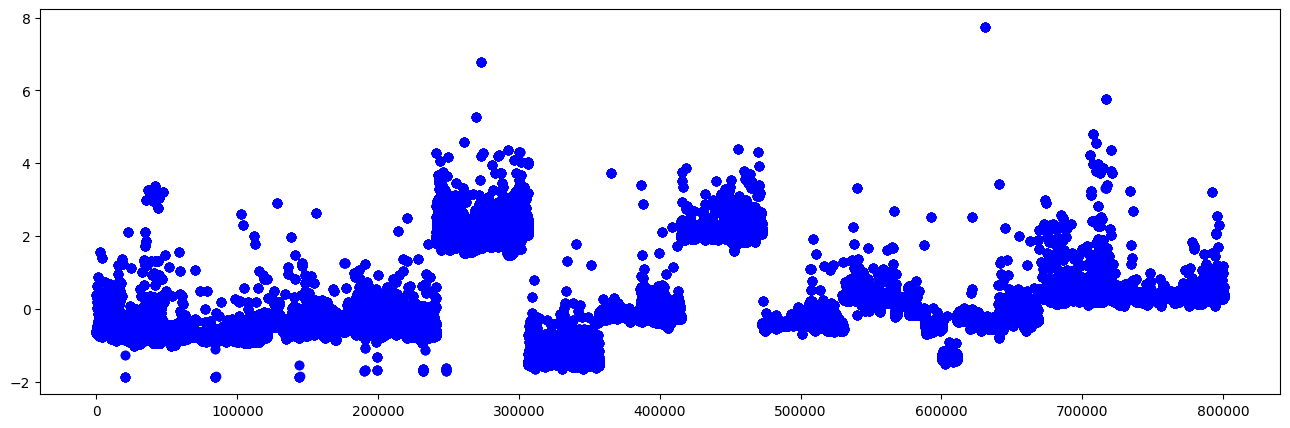

In [10]:
#plot actual values against arima predictions 
#add opacity
plt.scatter(range(len(test_df['normalizzed_rtt'])),test_df['normalizzed_rtt'] , color='blue')
#plt.scatter(range(len(test_df['arima_predictions'])), test_df['arima_predictions'], color='red')
